In [184]:
import pandas as pd
import numpy as np

from mlxtend.preprocessing import minmax_scaling


import seaborn as sns
import missingno
%matplotlib inline
import matplotlib.pyplot as plt

# load the Titanic dataset and have a look.
df = pd.read_csv("Titanic.csv")
df.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


In [187]:
# explore more by looking to the data size.
df.shape

(891, 12)

In [188]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [174]:
# looking to the data types.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [189]:
# looking for missing data.
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

- The Cabin has missing data not at random MNAR, maybe most of the passengers finds it not nessessary to provide, or prefer not to provide. 
- Do we need the Cabin in our insights? no, We can drop it.
- The Age has missing data at random MAR, may be relates to the age group.
- Do we need the Age in our insights? maybe, so we can fill in with the mean.
- Embarked has missing data completely at random MCAR maybe missed by mistake. 
- Do we need to replace? Yes by inserting the same value as the value before or after.

In [190]:
# dropping the column Cabin, Name, Ticket.
df.drop('Cabin',axis=1, inplace=True)
df.drop('Name',axis=1, inplace=True)
df.drop('Ticket',axis=1, inplace=True)
df.head(10)

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,0,3,male,22.0,1,0,7.2500,S
1,2,1,1,female,38.0,1,0,71.2833,C
2,3,1,3,female,26.0,0,0,7.9250,S
3,4,1,1,female,35.0,1,0,53.1000,S
4,5,0,3,male,35.0,0,0,8.0500,S
5,6,0,3,male,NaN,0,0,8.4583,Q
6,7,0,1,male,54.0,0,0,51.8625,S
7,8,0,3,male,2.0,3,1,21.0750,S
8,9,1,3,female,27.0,0,2,11.1333,S
9,10,1,2,female,14.0,1,0,30.0708,C


In [191]:
df = pd.DataFrame(df) 
  
# Finding the mean of the column Age into NaN values 
mean_value = int(df['Age'].mean()) 
print(mean_value)

# Replace NaNs in column Age with the mean of values in the same column 
df['Age'].fillna(value=mean_value, inplace=True)
df.head(10)

29


C:\Users\44776\AppData\Local\Temp\ipykernel_19784\17200201.py:8: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Age'].fillna(value=mean_value, inplace=True)


,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,0,3,male,22.0,1,0,7.2500,S
1,2,1,1,female,38.0,1,0,71.2833,C
2,3,1,3,female,26.0,0,0,7.9250,S
3,4,1,1,female,35.0,1,0,53.1000,S
4,5,0,3,male,35.0,0,0,8.0500,S
5,6,0,3,male,29.0,0,0,8.4583,Q
6,7,0,1,male,54.0,0,0,51.8625,S
7,8,0,3,male,2.0,3,1,21.0750,S
8,9,1,3,female,27.0,0,2,11.1333,S
9,10,1,2,female,14.0,1,0,30.0708,C


In [192]:
df.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Sex            0
Age            0
SibSp          0
Parch          0
Fare           0
Embarked       2
dtype: int64

In [195]:
# filling the NaN values in Embarked column with the same vales as the values that comes before.
df['Embarked'] = df['Embarked'].bfill()

In [196]:
df.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Sex            0
Age            0
SibSp          0
Parch          0
Fare           0
Embarked       0
dtype: int64

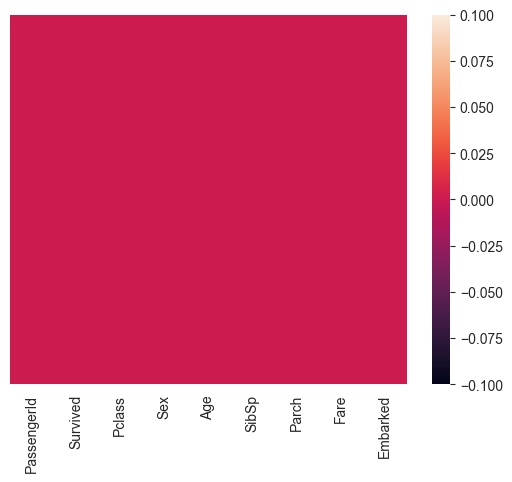

In [197]:
sns.heatmap(df.isnull(), yticklabels=False, cbar='viridis')
plt.show()

In [198]:
df['Survived'].value_counts()
print('Total number of passengers in the training data...', len(df))
print('Number of passengers who survived...', len(df[df['Survived'] == 1]))
print('Number of passengers who did not survived...', len(df[df['Survived'] == 0]))

Total number of passengers in the training data... 891
Number of passengers who survived... 342
Number of passengers who did not survived... 549


<Axes: xlabel='Survived', ylabel='count'>

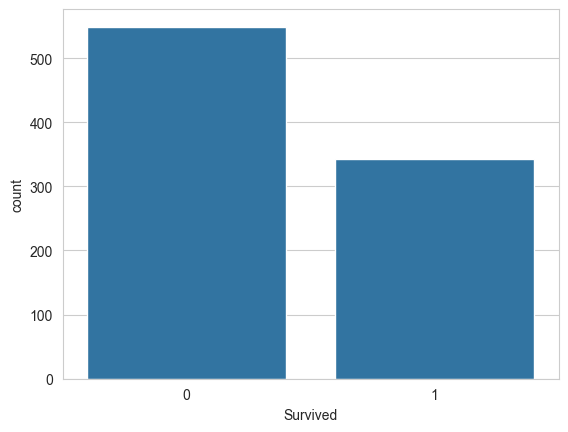

In [200]:
sns.set_style('whitegrid')
sns.countplot(x='Survived', data = df)

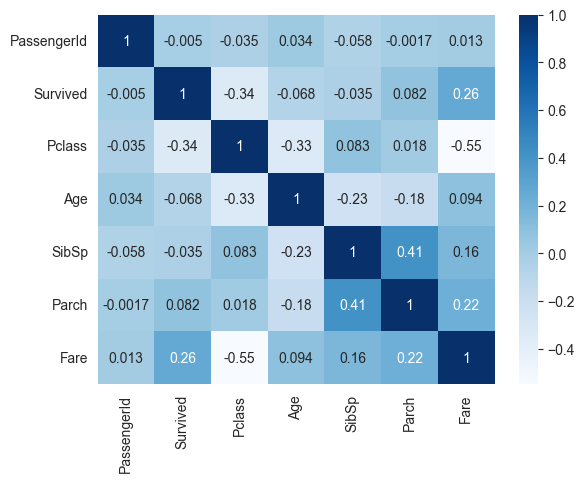

In [201]:
sns.heatmap(df.corr(numeric_only=True), cmap="Blues", annot=True)
plt.show()

<Axes: xlabel='Survived', ylabel='count'>

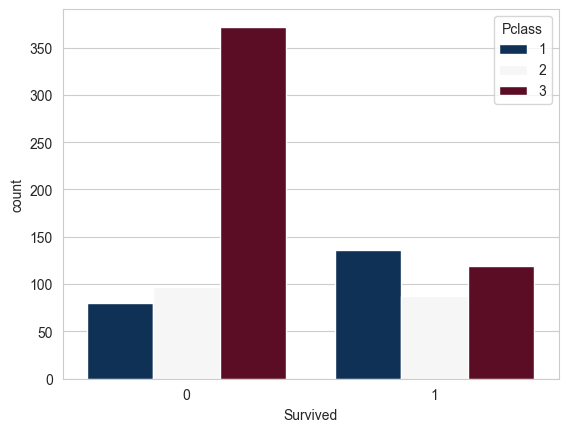

In [202]:
sns.set_style('whitegrid')
sns.countplot(x='Survived', hue='Pclass', data = df, palette = 'RdBu_r')

<Axes: xlabel='Survived', ylabel='count'>

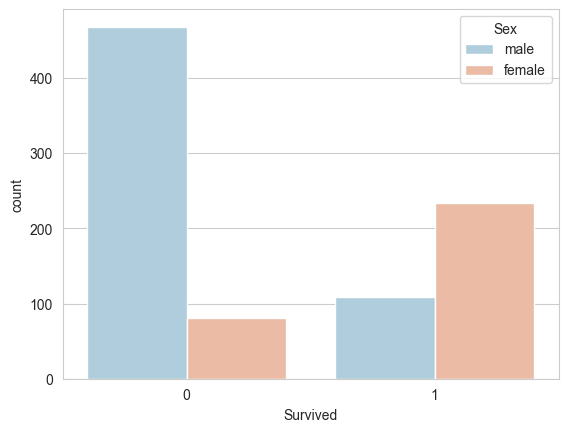

In [203]:
sns.set_style('whitegrid')
sns.countplot(x='Survived', hue='Sex', data = df, palette = 'RdBu_r')

<Axes: xlabel='Survived', ylabel='count'>

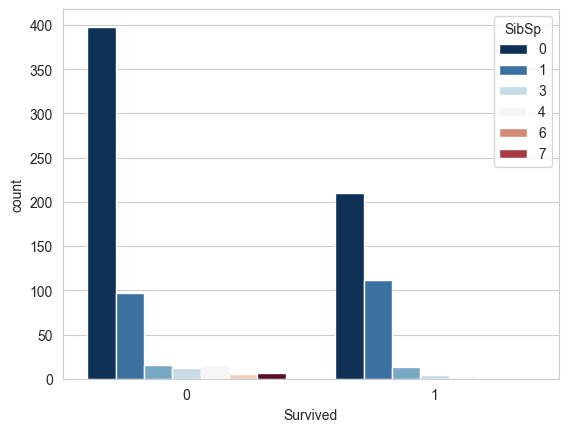

In [204]:
sns.set_style('whitegrid')
sns.countplot(x='Survived', hue='SibSp', data = df, palette = 'RdBu_r')

<Axes: xlabel='Survived', ylabel='count'>

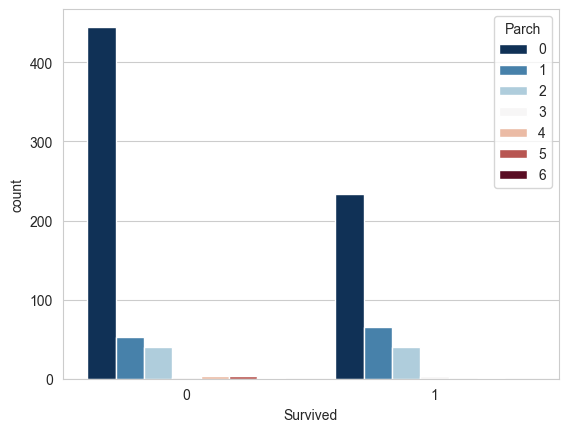

In [205]:
sns.set_style('whitegrid')
sns.countplot(x='Survived', hue='Parch', data = df, palette = 'RdBu_r')

# A1- The strongest stcorrelation coefficient with the target value of -0.34 closer to -1 is Pclass.
# A2- Yes
# A3- Yes
# A4- Most not Survived are males few of them with 3,4,6 and 7 seblings and 1,2,3,4 and 5 parents and children.
#     Most Servived are single some with one and/or 2 children and one and/or 3and 4 siblings.